<a href="https://colab.research.google.com/github/Data-Analytics-with-Python/individual-assignment-i-kotuzajl/blob/main/Assignment_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTANT: Before you start, enter your name and student number below.

**Full Name:** Lukas Kotuza-Janisch

**Student Number:** 400238647

# Exploring Customer Data with Pandas

Use the provided Nata Supermarkets dataset to answer the following questions.
Your goal is to use Pandas operations to explore, clean, and summarize the data, and to draw a few simple insights about customer demographics and behavior.

Please complete all task requested and answer all questions explicitly and support your answers with Python codes. Insert code and text cells as you need.

## 1. Inspecting and loading the Data (10pts)

* Save the dataset in the case supplementary file (in Excel) as a csv file and upload it to Colab.

* Load the dataset as a pandas data frame and display the first few rows.

    * How many features (columns) and records (rows) are in the dataset?

In [11]:
import pandas as pd

url = "https://raw.githubusercontent.com/Data-Analytics-with-Python/individual-assignment-i-kotuzajl/main/O712_Assignment1_Data.csv"
df = pd.read_csv(url)
display(df.head())
print(f"Number of features (columns): {df.shape[1]}")
print(f"Number of records (rows): {df.shape[0]}")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Number of features (columns): 29
Number of records (rows): 2240


## 2. Data Cleaning and Missing Values (14pts)

* Check for missing values across all columns.

* Which columns contain missing data, and how many missing entries are there?

* What strategies could you use to handle them (drop, fill, or ignore)? Apply one reasonable approach and explain your choice.

In [12]:
#Check for missing values across all columns
missing_values = df.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


The income column has 24 null entries. No other columns have blank information. Here I am treating 0 as a value.

In [13]:
#Drop the income entries that are blank
df = df.dropna(subset=['Income'])
missing_values = df.isnull().sum()
print(missing_values)

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


I have chosen to drop these values since there weren't that many of them. The worst option would have been to fill in an articifial value, such as $0, this would give us incorrect data when trying to analyze the data. Ignoring would have also worked although the overall data is less clean.

## 3. Removing Constant Columns (14pts)

* Identify any columns with constant values (no variance; all rows have the same value).

* Drop them from your DataFrame and confirm how many columns remain.

In [14]:
#Find constant columns
constant_columns = df.columns[df.nunique() == 1]
print(constant_columns)

#Drop constant columns
df = df.drop(columns=constant_columns)
print(df.shape[1]) #we now see there are 2 columns less
display(df.columns[df.nunique() == 1])

Index(['Z_CostContact', 'Z_Revenue'], dtype='object')
27


Index([], dtype='object')

We see previously in the first question of this assigment there were 29 columns. Using 'nunique' it was found that the columns 'Z_CostContact' and 'Z_Revenue' contain constant data. After removing I check check the number of columns again, and it is now 27 instead of 29.

## 4. Add a new column (15pts)

* Add a new column **Customer_Days** to store the total number of days each customer has been with the company. You may follow the steps below:
  * use `pd.to_datetime(df["Dt_Customer"])` to convert the string variable to a *date-time* variable

  * use `today = datetime.today()` to find the date of today

  * use `(today - df["Dt_Customer"]).dt.days` to find the difference between today and the onbard date.

In [17]:
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='mixed', dayfirst=True)
today = datetime.today()
df['Customer_Days'] = (today - df['Dt_Customer']).dt.days
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,4936
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,4090
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,4437
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,4030
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,4286


## 5. Categorical Features (15 pts)

* For `Education` and `Marital_Status`,

  * find how many customers fall into each category
  * create pie charts to show the percentage of each category; make sure to show the percentage numbers on the chart with 2 decimal places

* What do you findings suggest about the company's target demographic?

In [19]:
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


<Axes: title={'center': 'Education Percentages'}, ylabel='count'>

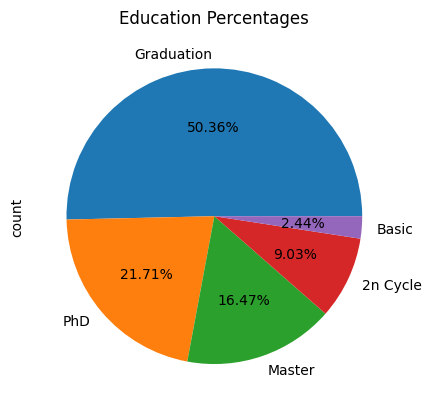

In [22]:
df.Education.value_counts().plot(kind='pie', autopct='%1.2f%%', title='Education Percentages')


<Axes: title={'center': 'Marital Status Percentages'}, ylabel='count'>

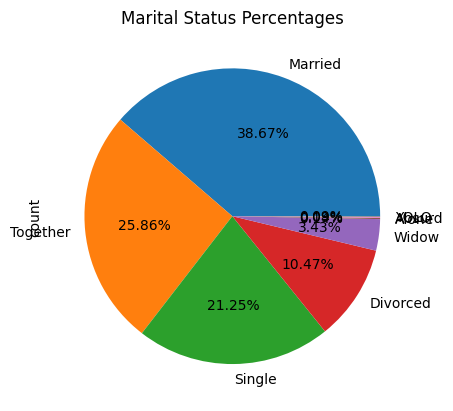

In [27]:
df.Marital_Status.value_counts().plot(kind='pie', autopct='%1.2f%%', title='Marital Status Percentages')


There target demographic should be graduates (50.36%) that are in a relationship (38.67% married, 25.86% together, 64.53% total)

## 6. Numeric Variables (15pts)

* For `Income`, `Kidhome`, and `Teenhome`,
  * use boxplots to visualize their distributions.

* Based on these distributions, what can you say about the typical household profile of Nata's customers?

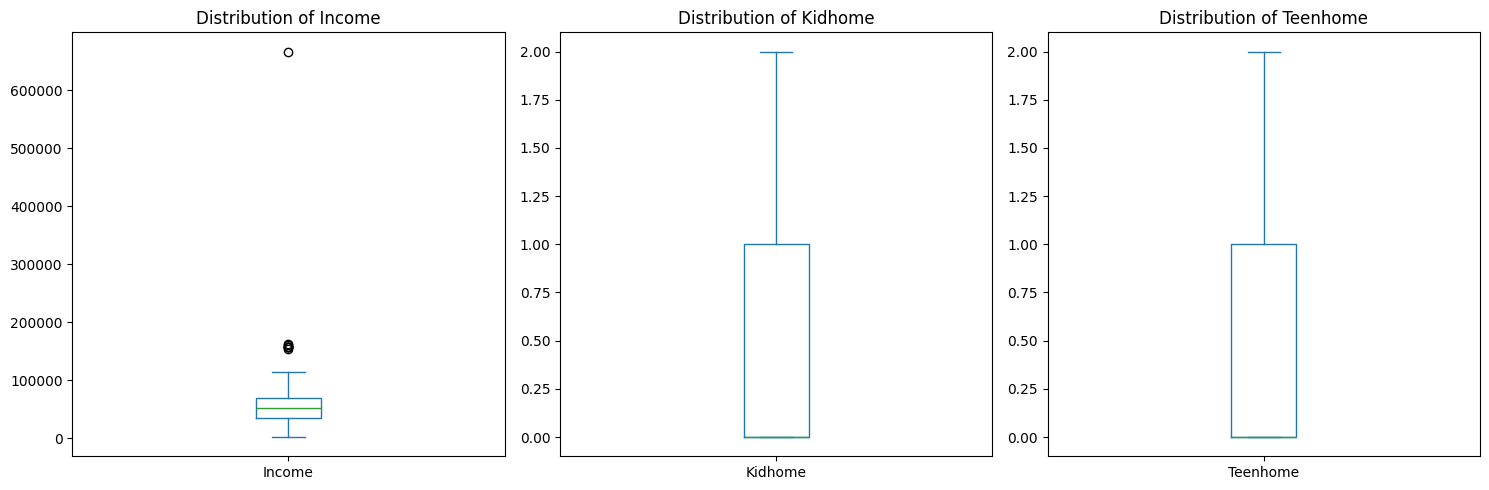

In [38]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1, 3, figsize=(15, 5))

df['Income'].plot(kind = 'box', ax=axes[0], title = 'Distribution of Income')
df['Kidhome'].plot(kind = 'box', ax=axes[1], title = 'Distribution of Kidhome')
df['Teenhome'].plot(kind = 'box', ax=axes[2], title = 'Distribution of Teenhome')

plt.tight_layout()
plt.show()

## 7. Spending by Products (15pts)

* Examine the spending amount columns `MntWines`,	`MntFruits`,	`MntMeatProducts`,	`MntFishProducts`,	`MntSweetProducts`,	`MntGoldProds`, and find the product with the highest total spending amount by all customers.



In [39]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df[spending_columns].sum()

highest_spending_product = total_spending.idxmax()
highest_spending_amount = total_spending.max()

print(f"The product with the highest total spending is '{highest_spending_product}' with a total of {highest_spending_amount:.2f}")

The product with the highest total spending is 'MntWines' with a total of 676083.00


## 8. Use of Gen. AI (2pts)

Use of Generative AI is allowed. Briefly describe if and how you have used Gen. AI tools in this assignment.

I used it in part 4 as I kept getting an error with the date formats mismatching. So I asked the AI how I would fix the formatting so I could analyze the data and it suggested using format='mixed' and dayfirst=True.

I also had issues getting the box plots to appear properly. I remembered that we can used subplots to make the plots look better but I coudn't figure out how to get it to work, so I used the AI tools to help and it came up with the axes variable.